In [1]:
# read yelp.csv into a DataFrame using a relative path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
yelp = pd.read_csv('Data/yelp.csv', encoding = "ISO-8859-1",index_col=False )

In [3]:
yelp.head(4)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0


In [ ]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

**Exploratory Data Analysis**

Visualization is a good way to do exploratory data analysis.

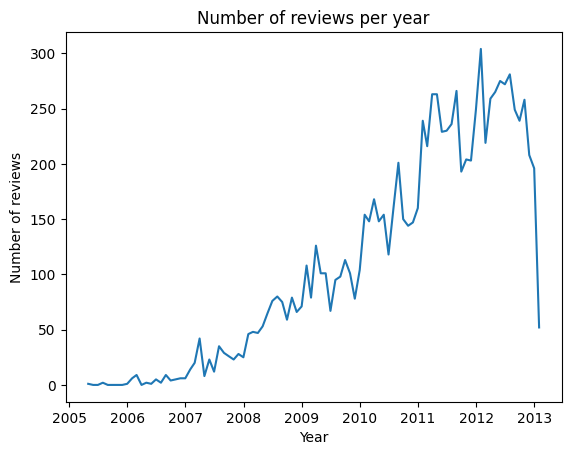

In [ ]:
yelp['date'] = pd.to_datetime(yelp['date'])
yelp1 = yelp
yelp1 = yelp1.set_index('date')
plt.plot(yelp1['text'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per year')
plt.show()

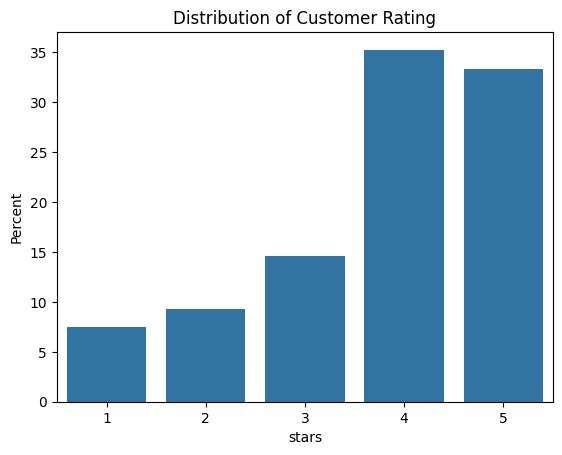

In [ ]:
ax = sns.barplot(data=yelp, x='stars', y='stars', estimator=lambda x: len(x) / len(yelp) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

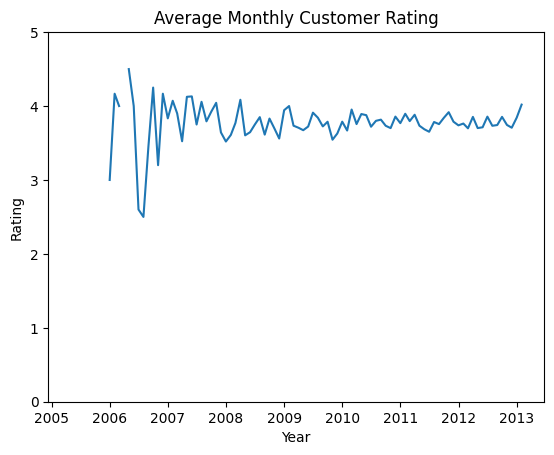

In [ ]:
plt.plot(yelp1['stars'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

**Stopwords**

In every language, there are words that occur too frequently and are not informative, such as “a”, “an”, “the”, “and” in English. It is useful to build a list containing all the stopwords and get rid of them before we do any text mining.

Depending on the specific context, you may also want to add more to the list. For example, words like “https”, “RT” are not very meaningful.

In [ ]:
from nltk.corpus import stopwords

**Word Cloud**

Word cloud is a very popular way to highlight the words with high-frequency in textual data. The more a specific word appears in the text, the bigger and bolder it will be in the word cloud.

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS


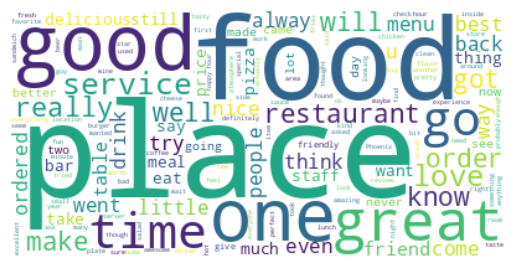

In [ ]:

# concatenate all the reviews into one single string
full_text = ' '.join(yelp['text'])

my_stop_words = ["https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

## Vader

This method has a predefined list of words with sentiment scores and it matches words from the lexicon with words from the text. I will use the VADER analyzer in the NLTK package. For each piece of text, the analyzer provides four scores: negative, neutral, positive and compound. The first three are easy to understand and for the compound score, it is a combination of positive and negative scores and ranges from -1 to 1: below 0 is negative and above 0 is positive. I am going to use the compound score to measure the sentiment.

In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon') #import nltk first if you have not imported it
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
yelp_best_worst = yelp[(yelp["stars"]==5) | (yelp["stars"]==1)].reset_index()

In [ ]:
yelp_best_worst.describe()

,index,stars,cool,useful,funny
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,4986.533774,4.266765,0.876897,1.422663,0.690651
std,2903.416903,1.547868,2.336611,2.598515,1.961751
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2475.250000,5.000000,0.000000,0.000000,0.000000
50%,4967.500000,5.000000,0.000000,1.000000,0.000000
75%,7507.750000,5.000000,1.000000,2.000000,1.000000
max,9999.000000,5.000000,77.000000,76.000000,39.000000


In [ ]:
yelp.sample(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
2829,QKGZajo_Xm6AW3lHkU9Mmg,2006-01-14,3AZHdOPpk7TUAtDjKbex6g,5,Mastro's serves up the best steak in Scottsdal...,review,7Ztf1LMEz5Zm0njxc46jLw,2,1,0
2268,CqKiF2X0_4erH02-CUiweQ,2012-04-27,PfPV7R1DoWKe-ufucipKzw,3,I eat here often because it is close to where ...,review,J_Wqa5tUZ6pen_OD1ikCEw,0,1,0
1968,XWvht_1ZLdK7EHJ3jo4q0g,2010-12-15,9b55G_rAfvQIKc-MaOOLVQ,4,Made our way here last night for my Birthday D...,review,_j4PdUTEw7N3NXQM628ZKA,2,2,0
9722,ZRJwVLyzEJq1VAihDhYiow,2011-06-02,vE1ZUN_folRLOxvFnUFXNA,3,Spinato's has great red sauce for the pasta bu...,review,CcdJ_VhU_zqe2fL7G3eXug,0,0,0
28,vz2zQQSjy-NnnKLZzjjoxA,2011-03-30,Y_ERKao0J5WsRiCtlKSNSA,4,"Came here for breakfast yesterday, it had been...",review,EP3cGJvYiuOwumerwADplg,1,1,1
6613,D1T1jtCfTfXD-cQE3QViow,2012-08-14,D7cUmPnXrM5vjubiYLCrQg,4,The Chorizo gravy can be habit forming.,review,SMeQwT7awoyAO9I4x39Ztg,0,0,0
5402,39oUcXr-06fcfT_MZ94z-Q,2011-02-02,mP_gWmLRN2TL1s9eTy1Wrg,4,Just happened to be in the neighborhood when w...,review,180RmODjWMOtR1p93pXZWQ,0,0,0
4942,sv8tYgFzIRKHHERURumyVQ,2012-08-07,tJ40zwu59uXmTh_PmWg7-g,5,Love this lake. Went paddle boarding a few wee...,review,89H9-Ius_EWMhAQ4zZuvOw,0,0,0
2053,xsSnuGCCJD4OgWnOZ0zB4A,2010-02-14,0_4XOZ-O239bx04chvU_ug,4,"Wings are not my favorite type of food, and I ...",review,Znu5KKqytHfmjbXfQo3f4Q,0,0,0
2466,giyl3pyGo6sbvsnn94f4Hg,2012-10-21,pQTYqf5JwTqDDoU6oeA4WQ,4,We really enjoyed lunch today. Very good serv...,review,Sq2Ggj2UgbPH1wLS3tNZEg,0,0,0


In [ ]:
print(yelp_best_worst.loc[0, 'text'])
print()
sid.polarity_scores(yelp_best_worst.loc[0, 'text'])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!



{'neg': 0.015, 'neu': 0.687, 'pos': 0.298, 'compound': 0.995}

In [ ]:
print(yelp_best_worst.loc[5, 'text'])
print()
sid.polarity_scores(yelp_best_worst.loc[5, 'text'])

Nobuo shows his unique talents with everything on the menu. Carefully crafted features with much to drink. Start with the pork belly buns and a stout. Then go on until you can no longer.



{'neg': 0.059, 'neu': 0.775, 'pos': 0.166, 'compound': 0.4588}

In [ ]:
yelp_best_worst[yelp_best_worst["stars"]==1] #more likely to be negative

,index,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
12,23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1
16,31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0
18,35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3
23,61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0
24,64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4051,9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0
4052,9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0
4062,9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0
4078,9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2


In [ ]:
print(yelp_best_worst.loc[12, 'text'])
print()
sid.polarity_scores(yelp_best_worst.loc[12, 'text'])

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!



{'neg': 0.188, 'neu': 0.759, 'pos': 0.053, 'compound': -0.9557}

In [ ]:
sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

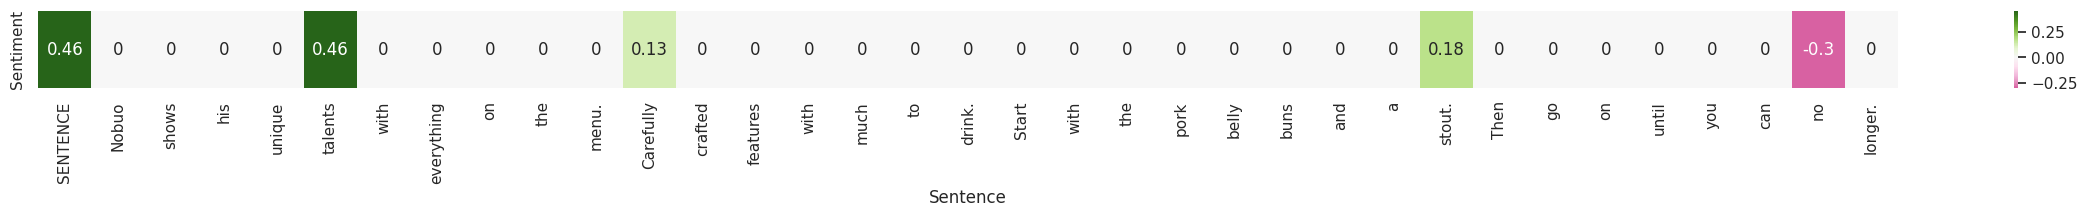

In [ ]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + yelp_best_worst.loc[5, 'text'].split(),
    "Sentiment":[sid.polarity_scores(yelp_best_worst.loc[5, 'text'])["compound"]]
    + [sid.polarity_scores(word)["compound"] for word in yelp_best_worst.loc[5, 'text'].split()]
})

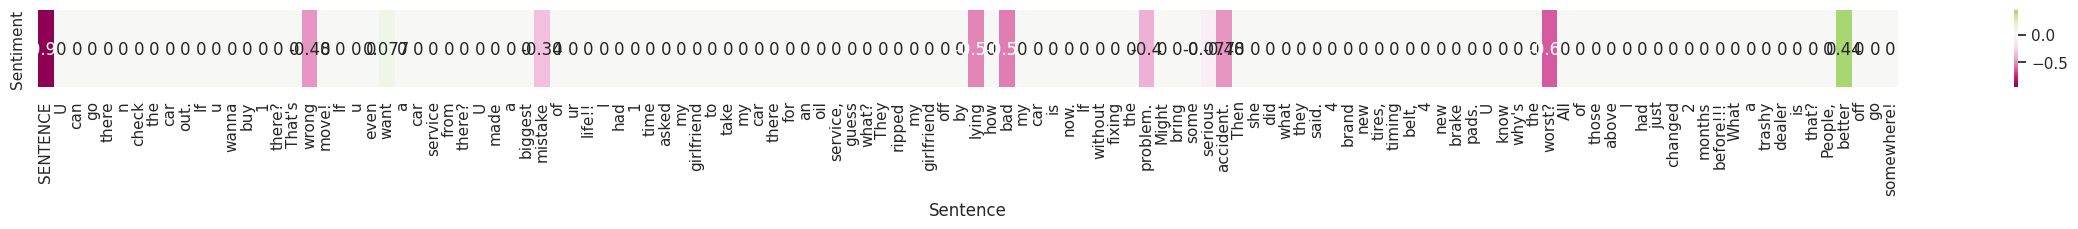

In [ ]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + yelp_best_worst.loc[12, 'text'].split(),
    "Sentiment":[sid.polarity_scores(yelp_best_worst.loc[12, 'text'])["compound"]]
    + [sid.polarity_scores(word)["compound"] for word in yelp_best_worst.loc[12, 'text'].split()]
})

In [ ]:
# create a new DataFrame column for compound
yelp['compound'] = yelp['text'].apply(sid.polarity_scores)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,compound
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,"{'neg': 0.015, 'neu': 0.687, 'pos': 0.298, 'co..."
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,"{'neg': 0.049, 'neu': 0.741, 'pos': 0.21, 'com..."


## TextBlob

In [ ]:
from textblob import TextBlob


## TextBlob sentiment
Return a tuple of form (polarity, subjectivity ) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.



In [ ]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):

    #Converts the text into textblob object and then retuns
    #the subjectivity.
    blob = TextBlob(text)

    # return the subjectivity
    return blob.sentiment.subjectivity

In [ ]:
yelp_best_worst.loc[0,"text"]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [ ]:
blob = TextBlob(yelp_best_worst.loc[0,"text"])
print(blob)
print()
print(blob.sentiment)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)


In [ ]:
blob = TextBlob(yelp_best_worst.loc[12,"text"])
print(blob)
print()
print(blob.sentiment)

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!

Sentiment(polarity=-0.2640210700757576, subjectivity=0.5928030303030303)


In [ ]:
yelp_best_worst["subjectivity"] = yelp_best_worst.text.apply(detect_sentiment)

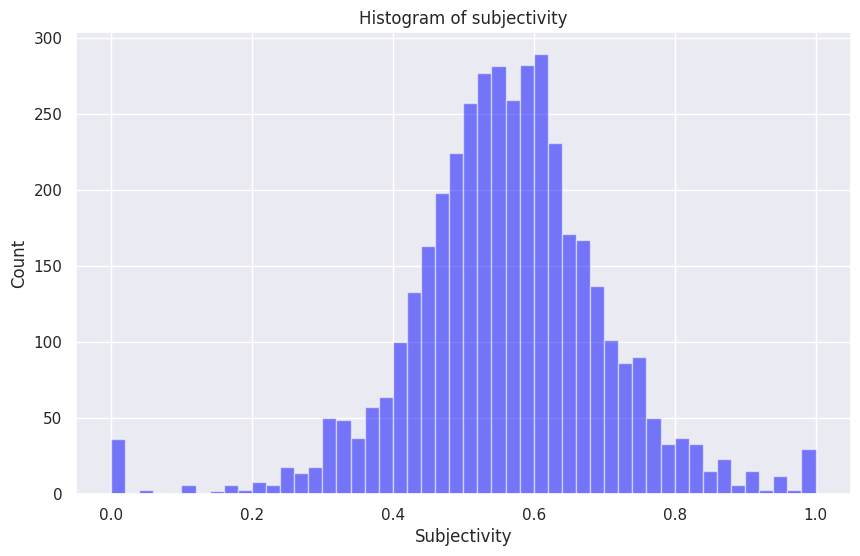

In [ ]:
#Draw a histogram that shows the distribution of subjectivity: Count vs. subjectivity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(yelp_best_worst.subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of subjectivity')
plt.show()